In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.figsize'] = (12, 6)
pokedados=pd.read_csv("Pokemon.csv")
pd.options.mode.chained_assignment = None

In [9]:
print(pokedados.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [10]:
def SetDataFrameType(dataframeN,type1,type2):
    index=[]
    dataframe=dataframeN.fillna("None")
    for i in range(len(dataframe)):
        if type2=="All":
            if dataframe["Type 1"][i]==type1 or dataframe["Type 2"][i]==type1:
                index.append(i)
        if type2=="None":
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]=="None":
                index.append(i)      
        else:
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]==type2 or dataframe["Type 1"][i]==type2 and dataframe["Type 2"][i]==type1:
                index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    return DF

def SetDataFrameLegendary(dataframe):
    index=[]
    for i in dataframe.index:
        if dataframe["Legendary"][i]==True:
            index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    
    return DF

def Generation(dataframe,gen):
    DF=dataframe.loc[(dataframe.Generation == gen)]
    
    return DF
    
def Group(dataframe,x):
    for i,j in enumerate(dataframe.index):
        dataframe.loc[j,"Group"]=""
        if x[i] == 0:
            dataframe.loc[j,"Group"]="Group 1"
        if x[i] == 1:
            dataframe.loc[j,"Group"]="Group 2"
        if x[i] == 2:
            dataframe.loc[j,"Group"]="Group 3"
        if x[i] == 3:
            dataframe.loc[j,"Group"]="Group 4"
    
    return dataframe
            
            
        
    

In [19]:
DFWater=pokedados
f1 = DFWater['HP'].values
f2 = DFWater['Attack'].values
f3 = DFWater['Sp. Atk'].values
f4 = DFWater['Defense'].values
f5 = DFWater['Sp. Def'].values
f6 = DFWater['Speed'].values
X=np.array(list(zip(f1,f2,f3,f4,f5,f6))).reshape(len(f1),6)
kmeans = KMeans(n_clusters=4).fit(X)

x= kmeans.fit_predict(X)
a = Group(DFWater,x)
a

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Group
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Group 3
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Group 2
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Group 2
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Group 4
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Group 3
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Group 2
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Group 2
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,Group 4
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,Group 4
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Group 3


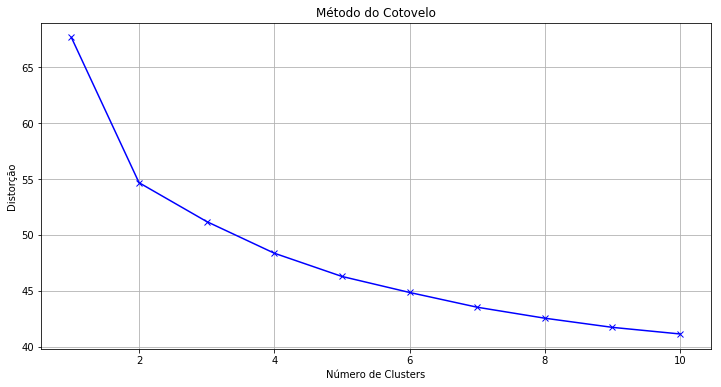

In [41]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.grid(True)
plt.title('Método do Cotovelo')
plt.show()

90.0 134.333333333
72.5 90.0


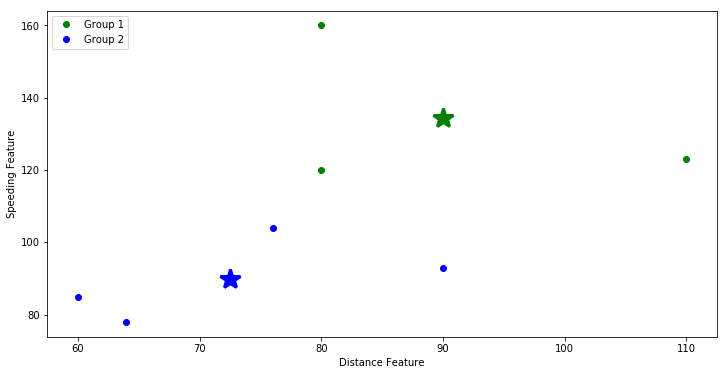

In [14]:
plt.figure()
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
# print centroid 1
print(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]))
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
# print centroid 2
print(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]))
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')

plt.legend([h1,h2],['Group 1','Group 2'], loc='upper left')
plt.show()